In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
from google.colab import drive #to import google drive data

In [27]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
cd /content/drive/"My Drive/Colab Notebooks/Logistic Regression"

/content/drive/My Drive/Colab Notebooks/Logistic Regression


In [29]:
columnname=['X','Y','Z']
dataset=pd.read_csv("ex2data1.txt",names=columnname)
print(dataset)
dataset.shape

            X          Y  Z
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]


(100, 3)

In [30]:
dataf=pd.DataFrame(dataset)
dataf.describe()

,X,Y,Z
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [45]:
X=dataf.iloc[:,:-1].values
Y=dataf.iloc[:,-1].values

In [46]:
pos,neg=(Y==1).reshape(100,1),(Y==0).reshape(100,1)

In [47]:
pos

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

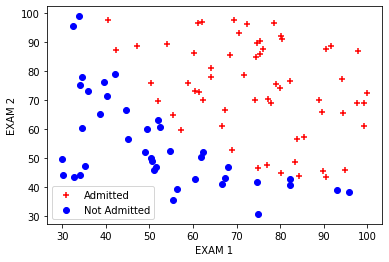

In [48]:
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
plt.xlabel("EXAM 1")
plt.ylabel("EXAM 2")
plt.legend(["Admitted","Not Admitted"])

In [49]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [50]:
sigmoid(0)

0.5

In [51]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [52]:
def costfunction(theta,X,Y):
    m=len(Y)
    error=0
    for i in range(m):
        predictions=sigmoid(np.dot(X[i],theta))
        error=error+((Y[i]*np.log(predictions))-((1-Y[i])*np.log(1-predictions)))
    cost=1/m*error
    grad=1/m*np.dot(X.transpose(),(predictions-Y))  #X=(100,2)  prediction-y=(100,1)

    print(cost)
    return cost,grad


In [53]:
m,n=X.shape[0],X.shape[1]
X,X_mean,X_std=feature_normalization(X)
X=np.append(np.ones((m,1)),X,axis=1)
Y=Y.reshape(m,1)
initial_theta=np.zeros((n+1,1))
costfunction(initial_theta,X,Y)

[-0.13862944]


(array([-0.13862944]), array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [54]:
def gradientDescent(X,Y,theta,alpha,num_iters):
  m=len(Y)
  cost_function_values=[]

  for i in range(num_iters):
    cost,grad=costfunction(theta,X,Y)
    cost_function_values.append(cost)
    theta=theta-(alpha*grad)

    if(i%10==0):
      plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
      plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="o",s=10)
      x_value=np.array([np.min(X[:,1]),np.max(X[:,1])])
      y_value=-(theta[0]+theta[1]*x_value)/theta[2]
      plt.plot(x_value,y_value,"g")
      plt.xlabel("EXAM 1")
      plt.ylabel("EXAM 2")
      plt.legend(["Admitted","Not Admitted"],loc=0)
      plt.show()
  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("number of iteration")
  plt.ylabel("Cost/loss values")
  plt.title("cost Function curve")
  plt.show()
  return theta,cost_function_values


[-0.13862944]


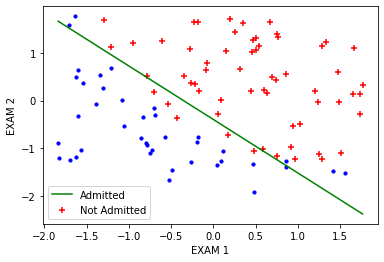

[-0.13763249]
[-0.13666892]
[-0.13573836]
[-0.1348404]
[-0.13397466]
[-0.13314076]
[-0.13233832]
[-0.13156694]
[-0.13082625]
[-0.13011587]


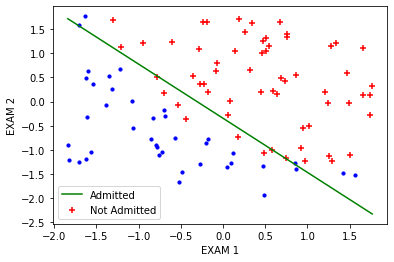

[-0.12943542]
[-0.12878451]
[-0.12816278]
[-0.12756985]
[-0.12700534]
[-0.12646889]
[-0.12596014]
[-0.1254787]
[-0.12502422]
[-0.12459633]


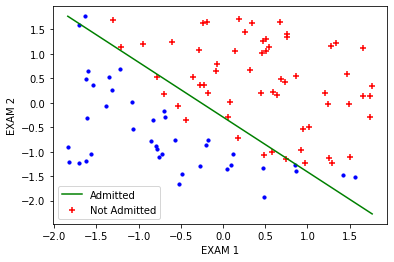

[-0.12419468]
[-0.1238189]
[-0.12346865]
[-0.12314356]
[-0.12284329]
[-0.12256749]
[-0.12231581]
[-0.12208791]
[-0.12188345]
[-0.12170209]


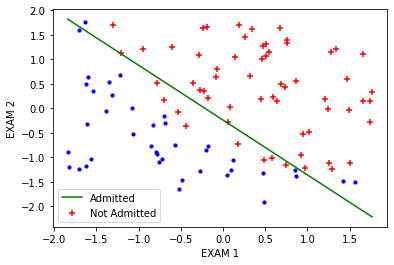

[-0.1215435]
[-0.12140734]
[-0.12129329]
[-0.12120101]
[-0.12113018]
[-0.12108049]
[-0.12105161]
[-0.12104322]
[-0.12105503]


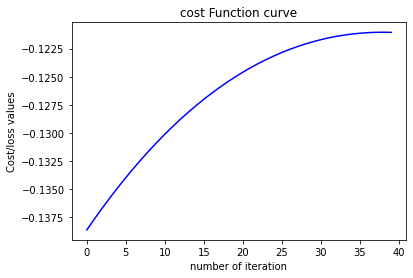

In [55]:
theta,costfunction=gradientDescent(X,Y,initial_theta,0.02,40)